<h1 align=center><font size = 5>Introduction to Matplotlib and Line Plots</font></h1>

## Table of Contents

1. Exploring Datasets with *pandas*

2. Visualizing Data using Matplotlib

3. Line Plots

## The Dataset: Immigration to Canada from 1980 to 2013 <a id="2"></a>

Dataset Source: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml).

The dataset contains annual data on the flows of international immigrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. The current version presents data pertaining to 45 countries.

---

## *Pandas* Basics<a id="4"></a>

In [45]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

Now we are ready to read in our data.

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
df_can = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/01InitialProjectsIB/AutomobilesDSPython/DataVisualizationWithPython/Data/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20))

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Let's view the top 5 rows of the dataset using the `head()` function.

In [48]:
# show the first 10 rows of the dataframe
df_can.head(10)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,1,0,0,0,0,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,0,0,0,0,0,2,0,0,0,3,0,1,0,0,0,0,0,2,0,0,1,0,2,0,0,1,1,0,0,0,0,1,1
5,Immigrants,Foreigners,Angola,903,Africa,911,Middle Africa,902,Developing regions,1,3,6,6,4,3,5,5,11,6,8,23,26,22,8,26,38,27,58,49,70,169,168,165,268,295,184,106,76,62,61,39,70,45
6,Immigrants,Foreigners,Antigua and Barbuda,904,Latin America and the Caribbean,915,Caribbean,902,Developing regions,0,0,0,0,42,52,51,61,34,51,31,59,61,44,18,23,21,27,19,12,13,25,17,25,14,24,32,15,32,38,27,37,51,25
7,Immigrants,Foreigners,Argentina,904,Latin America and the Caribbean,931,South America,902,Developing regions,368,426,626,241,237,196,213,519,374,538,678,763,1023,1022,366,380,396,391,349,318,427,635,865,1745,1591,1153,847,620,540,467,459,278,263,282
8,Immigrants,Foreigners,Armenia,935,Asia,922,Western Asia,902,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,22,21,66,75,102,115,89,112,124,87,132,153,147,224,218,198,205,267,252,236,258,207
9,Immigrants,Foreigners,Australia,909,Oceania,927,Australia and New Zealand,901,Developed regions,702,639,484,317,317,319,356,467,410,553,620,640,734,886,702,668,699,623,479,523,599,799,747,876,930,909,875,1033,1018,1018,933,851,982,1121


In [49]:
# show the last 5 rows of the dataframe
df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
192,Immigrants,Foreigners,Yemen,935,Asia,922,Western Asia,902,Developing regions,1,2,1,6,0,18,7,12,7,18,4,18,41,41,39,73,144,121,141,134,122,181,171,113,124,161,140,122,133,128,211,160,174,217
193,Immigrants,Foreigners,Zambia,903,Africa,910,Eastern Africa,902,Developing regions,11,17,11,7,16,9,15,23,44,68,77,69,73,46,51,41,34,72,34,51,39,78,50,46,56,91,77,71,64,60,102,69,46,59
194,Immigrants,Foreigners,Zimbabwe,903,Africa,910,Eastern Africa,902,Developing regions,72,114,102,44,32,29,43,68,99,187,129,94,61,72,78,58,39,44,43,49,98,110,191,669,1450,615,454,663,611,508,494,434,437,407
195,Immigrants,Foreigners,Unknown,999,World,999,World,999,World,44000,18078,16904,13635,14855,14368,13303,17304,22279,27118,28397,25293,33100,34589,30717,25152,25986,23151,13468,10132,10743,7993,5938,4052,3739,4785,4583,4348,4197,3402,3731,2554,1681,1484
196,Immigrants,Both,Total,999,World,999,World,999,World,143137,128641,121175,89185,88272,84346,99351,152075,161585,191550,216451,232802,254787,256638,224382,212864,226071,216036,174195,189950,227455,250636,229049,221349,235822,262242,251640,236753,247244,252170,280687,248748,257903,259021


In [50]:
# get basic information about your dataframe
df_can.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      197 non-null    object
 1   Coverage  197 non-null    object
 2   OdName    197 non-null    object
 3   AREA      197 non-null    int64 
 4   AreaName  197 non-null    object
 5   REG       197 non-null    int64 
 6   RegName   197 non-null    object
 7   DEV       197 non-null    int64 
 8   DevName   197 non-null    object
 9   1980      197 non-null    int64 
 10  1981      197 non-null    int64 
 11  1982      197 non-null    int64 
 12  1983      197 non-null    int64 
 13  1984      197 non-null    int64 
 14  1985      197 non-null    int64 
 15  1986      197 non-null    int64 
 16  1987      197 non-null    int64 
 17  1988      197 non-null    int64 
 18  1989      197 non-null    int64 
 19  1990      197 non-null    int64 
 20  1991      197 non-null    int64 
 21  1992      197 no

In [51]:
# get the list of column headers
df_can.columns.values 

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013], dtype=object)

In [52]:
# get the list of indicies 
df_can.index.values

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

To view the dimensions of the dataframe, we use the `.shape` parameter.

In [53]:
# size of dataframe (rows, columns)
df_can.shape    

(197, 43)

In [54]:
# data types of columns
df_can.dtypes

Type        object
Coverage    object
OdName      object
AREA         int64
AreaName    object
REG          int64
RegName     object
DEV          int64
DevName     object
1980         int64
1981         int64
1982         int64
1983         int64
1984         int64
1985         int64
1986         int64
1987         int64
1988         int64
1989         int64
1990         int64
1991         int64
1992         int64
1993         int64
1994         int64
1995         int64
1996         int64
1997         int64
1998         int64
1999         int64
2000         int64
2001         int64
2002         int64
2003         int64
2004         int64
2005         int64
2006         int64
2007         int64
2008         int64
2009         int64
2010         int64
2011         int64
2012         int64
2013         int64
dtype: object

In [55]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.Here, we will remove 5 columns
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


In [56]:
# check the dataframe after dropping the columns
df_can.shape

(197, 38)

In [57]:
# rename 3 columns
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603


In [58]:
# add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013
df_can['Total'] = df_can.sum(axis=1)
df_can.head(2)

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699


In [60]:
# check to see how many null values in each column in the dataset
df_can.isnull().sum()

Country      0
Continent    0
Region       0
DevName      0
1980         0
1981         0
1982         0
1983         0
1984         0
1985         0
1986         0
1987         0
1988         0
1989         0
1990         0
1991         0
1992         0
1993         0
1994         0
1995         0
1996         0
1997         0
1998         0
1999         0
2000         0
2001         0
2002         0
2003         0
2004         0
2005         0
2006         0
2007         0
2008         0
2009         0
2010         0
2011         0
2012         0
2013         0
Total        0
dtype: int64

In [61]:
# view a quick summary  (descriptive stats) of each column in our dataframe
df_can.describe()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.00000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,1.970000e+02
mean,1453.167513,1306.000000,1230.203046,905.431472,896.162437,856.304569,1008.639594,1543.908629,1640.456853,1944.670051,2197.472081,2363.472081,2586.670051,2605.461929,2277.989848,2161.055838,2295.137056,2193.258883,1768.477157,1928.426396,2309.187817,2544.527919,2325.370558,2247.197970,2394.131980,2662.35533,2554.720812,2403.583756,2510.091371,2560.101523,2849.614213,2525.360406,2618.304569,2629.654822,7.029657e+04
std,10784.524807,9449.373841,8864.905615,6503.149859,6452.570413,6155.858422,7205.630681,11045.558746,11809.252241,13939.908653,15782.827823,16849.811930,18502.248436,18673.483903,16443.126808,15494.979608,16458.146659,15694.794243,12605.884636,13783.035012,16544.011800,18204.260603,16642.749996,16100.180202,17119.626937,19104.65330,18261.461660,17129.490442,17908.071420,18276.881231,20386.174875,18082.496369,18763.159434,18838.224387,5.004158e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,7.000000,12.000000,10.000000,11.000000,15.000000,22.000000,15.000000,17.000000,16.000000,22.000000,20.000000,22.000000,21.000000,29.00000,26.000000,32.000000,32.000000,37.000000,42.000000,38.000000,43.000000,45.000000,9.520000e+02
50%,14.000000,10.000000,12.000000,12.000000,14.000000,17.000000,21.000000,33.000000,36.000000,45.000000,38.000000,59.000000,76.000000,92.000000,78.000000,100.000000,122.000000,115.000000,107.000000,117.000000,140.000000,175.000000,168.000000,165.000000,196.000000,211.00000,230.000000,198.000000,205.000000,217.000000,216.000000,196.000000,235.000000,217.000000,5.866000e+03
75%,266.000000,299.000000,299.000000,197.000000,207.000000,202.000000,257.000000,467.000000,476.000000,538.000000,620.000000,688.000000,734.000000,761.000000,566.000000,596.000000,638.000000,623.000000,563.000000,589.000000,838.000000,801.000000,709.000000,699.000000,866.000000,857.00000,856.000000,975.000000,975.000000,917.000000,953.000000,851.000000,799.000000,852.000000,2.331000e+04
max,143137.000000,128641.000000,121175.000000,89185.000000,88272.000000,84346.000000,99351.000000,152075.000000,161585.000000,191550.000000,216451.000000,232802.000000,254787.000000,256638.000000,224382.000000,212864.000000,226071.000000,216036.000000,174195.000000,189950.000000,227455.000000,250636.000000,229049.000000,221349.000000,235822.000000,262242.00000,251640.000000,236753.000000,247244.000000,252170.000000,280687.000000,248748.000000,257903.000000,259021.000000,6.924212e+06


---
## *Pandas* Indexing and Selection/ slicing<a id="6"></a>


Example: Let's try filtering on the list of countries ('Country'). Note that now the country field is called 'index' now as it is already used as the dataframe index

In [ ]:
df_can.index  # returns a series

RangeIndex(start=0, stop=195, step=1)

Let's try filtering on the list of countries ('OdName') and the data for years: 1980 - 1985.

In [63]:
# filtering on the list of countries and the data for years: 1980 - 1985
df_can[['Country',1980, 1981, 1982, 1983, 1984, 1985]]

,Country,1980,1981,1982,1983,1984,1985
0,Afghanistan,16,39,39,47,71,340
1,Albania,1,0,0,0,0,0
2,Algeria,80,67,71,69,63,44
3,American Samoa,0,1,0,0,0,0
4,Andorra,0,0,0,0,0,0
...,...,...,...,...,...,...,...
192,Yemen,1,2,1,6,0,18
193,Zambia,11,17,11,7,16,9
194,Zimbabwe,72,114,102,44,32,29
195,Unknown,44000,18078,16904,13635,14855,14368


In [64]:
# setting the 'Country' column as the index  of the dataframe and check the result
df_can.set_index('Country', inplace=True)

In [65]:
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


Example: Let's view the number of immigrants from Japan (row 87) for the following scenarios:
    1. The full row data (all columns)
    2. For year 2013
    3. For years 1980 to 1985

In [66]:
# 1. the full row data (all columns)
print(df_can.loc['Japan']) # get the row of Japan
print('__________________________________________________________________________________')

# alternate methods
print(df_can.iloc[87])# get the row number 87
print('********************************************************************************** using index')

print(df_can[df_can.index == 'Japan'])
print('################################################################################## using T')
print(df_can[df_can.index == 'Japan'].T)# T means to transpose the result
print('********************************************************************************** using T.squeeze')
print(df_can[df_can.index == 'Japan'].T.squeeze())# squeeze prints it without index

Continent                 Asia
Region            Eastern Asia
DevName      Developed regions
1980                       701
1981                       756
1982                       598
1983                       309
1984                       246
1985                       198
1986                       248
1987                       422
1988                       324
1989                       494
1990                       379
1991                       506
1992                       605
1993                       907
1994                       956
1995                       826
1996                       994
1997                       924
1998                       897
1999                      1083
2000                      1010
2001                      1092
2002                       806
2003                       817
2004                       973
2005                      1067
2006                      1212
2007                      1250
2008                      1284
2009    

In [67]:
# 2. for year 2013
print(df_can.loc['Japan', 2013])

# alternate method
print(df_can.iloc[87, 36]) # year 2013 is the last column, with a positional index of 36

982
982


In [68]:
# 3. for years 1980 to 1985
print(df_can.loc['Japan', [1980, 1981, 1982, 1983, 1984, 1984]])
print(df_can.iloc[87, [3, 4, 5, 6, 7, 8]])

1980    701
1981    756
1982    598
1983    309
1984    246
1984    246
Name: Japan, dtype: object
1980    701
1981    756
1982    598
1983    309
1984    246
1985    198
Name: Japan, dtype: object


In [72]:
# convert the column names (of the columns of years) into strings to slice the dataframe in an easy way
years = list(map(str, range(1980, 2014)))
years[:6]

['1980', '1981', '1982', '1983', '1984', '1985']

### Filtering based on a criteria
To filter the dataframe based on a condition, we **simply pass the condition as a boolean vector.**

For example, Let's filter the dataframe to show the data on Asian countries (AreaName = Asia).

In [76]:
# 1.  filter the dataframe based on a condition. create the condition boolean series
condition = df_can['Continent'] == 'Asia'
condition

Country
Afghanistan        True
Albania           False
Algeria           False
American Samoa    False
Andorra           False
                  ...  
Yemen              True
Zambia            False
Zimbabwe          False
Unknown           False
Total             False
Name: Continent, Length: 197, dtype: bool

In [77]:
# 2. pass this condition into the dataFrame
df_can[condition]

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Armenia,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,22,21,66,75,102,115,89,112,124,87,132,153,147,224,218,198,205,267,252,236,258,207,3310
Azerbaijan,Asia,Western Asia,Developing regions,0,0,0,0,0,0,0,0,0,0,0,0,0,17,18,23,26,38,62,54,77,98,186,167,230,359,236,203,125,165,209,138,161,57,2649
Bahrain,Asia,Western Asia,Developing regions,0,2,1,1,1,3,0,2,10,9,6,9,9,11,14,10,17,28,14,27,34,13,17,15,12,12,12,22,9,35,28,21,39,32,475
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,503,476,387,611,1115,1655,1280,1361,2042,2824,3378,2202,2064,3119,3831,2944,2137,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,0,0,1,0,2,2,1,1,4,2,2,1,3,6,6,8,7,1,5,10,7,36,865,1464,1879,1075,487,5876
Brunei Darussalam,Asia,South-Eastern Asia,Developing regions,79,6,8,2,2,4,12,16,103,63,44,65,31,36,14,17,4,6,1,3,6,3,4,6,3,4,5,11,10,5,12,6,3,6,600
Cambodia,Asia,South-Eastern Asia,Developing regions,12,19,26,33,10,7,8,14,15,27,34,38,93,418,371,286,216,313,241,165,245,259,230,277,348,370,529,460,354,203,200,196,233,288,6538
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [78]:
# we can pass mutliple criteria in the same line. 
# let's filter for AreaNAme = Asia and RegName = Southern Asia

df_can[(df_can['Continent']=='Asia') & (df_can['Region']=='Southern Asia')]

# note: When using 'and' and 'or' operators, pandas requires we use '&' and '|' instead of 'and' and 'or'
# don't forget to enclose the two conditions in parentheses

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Bangladesh,Asia,Southern Asia,Developing regions,83,84,86,81,98,92,486,503,476,387,611,1115,1655,1280,1361,2042,2824,3378,2202,2064,3119,3831,2944,2137,2660,4171,4014,2897,2939,2104,4721,2694,2640,3789,65568
Bhutan,Asia,Southern Asia,Developing regions,0,0,0,0,1,0,0,0,0,1,0,2,2,1,1,4,2,2,1,3,6,6,8,7,1,5,10,7,36,865,1464,1879,1075,487,5876
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,2989,3273,3781,3655,6250,6814,3959,2785,3956,6205,7982,7057,6208,5884,6169,8129,5918,6348,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Maldives,Asia,Southern Asia,Developing regions,0,0,0,1,0,0,0,0,0,0,0,0,3,3,0,0,0,0,1,0,1,0,1,0,1,0,0,2,1,7,4,3,1,1,30
Nepal,Asia,Southern Asia,Developing regions,1,1,6,1,2,4,13,6,13,4,23,29,32,40,31,66,132,155,104,157,236,272,363,313,404,607,540,511,581,561,1392,1129,1185,1308,10222
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,1072,1334,2261,2470,3079,4071,4777,4666,4994,9125,13073,9068,9979,15400,16708,15110,13205,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,4447,2779,2758,3525,7266,13102,9563,7150,9368,6484,5415,3566,4982,6081,5861,5279,4892,4495,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358


Before we proceed: let's review the changes we have made to our dataframe.

In [79]:
print ('data dimensions:', df_can.shape)
print(df_can.columns)
df_can.head(2)

data dimensions: (197, 38)
Index(['Continent', 'Region', 'DevName', '1980', '1981', '1982', '1983',
       '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992',
       '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', 'Total'],
      dtype='object')


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699


---
# Visualizing Data using Matplotlib<a id="8"></a>

Let's start by importing `Matplotlib` and `Matplotlib.pyplot` as follows:

In [80]:
# we are using the inline backend
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [81]:
#  check if Matplotlib is loaded
print ('Matplotlib version: ', mpl.__version__) 

Matplotlib version:  3.2.2


In [82]:
# apply a style to Matplotlib
print(plt.style.available)# get all the styles in Matplotlib
mpl.style.use(['ggplot']) # optional: for ggplot-like style

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Line Plots (Series/Dataframe) <a id="12"></a>

**Let's start with a case study:**

In 2010, **Haiti suffered a catastrophic magnitude 7.0 earthquake.**

In [87]:
# plot a line graph of immigration from Haiti after its catastrophic magnitude 7.0 earthquake in 2010
print(years[30:])
haiti = df_can.loc['Haiti', years[30:]]
haiti

['2010', '2011', '2012', '2013']


2010    4744
2011    6503
2012    5868
2013    4152
Name: Haiti, dtype: object

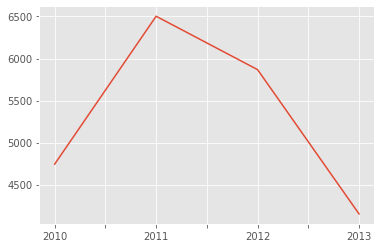

In [88]:
haiti.plot()

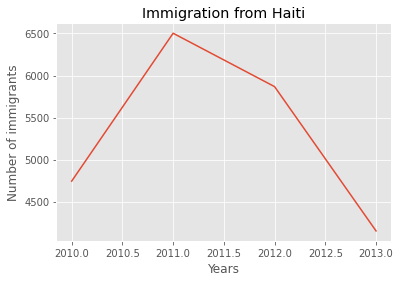

In [90]:
# plotting and labeling the axes
haiti.index = haiti.index.map(int) # let's change the index values of Haiti to type integer for plotting
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show()

We can clearly **notice how number of immigrants from Haiti spiked up from 2010 as Canada stepped up its efforts to accept refugees from Haiti.** 

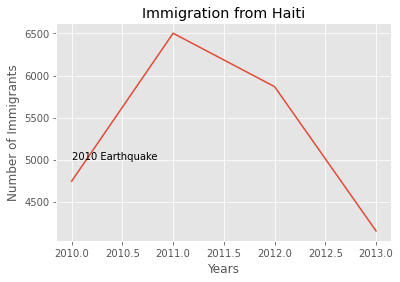

In [94]:
# Let's annotate this spike in the plot
haiti.plot(kind='line')

plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

# annotate the 2010 Earthquake. 
# syntax: plt.text(x, y, label)
plt.text(2010, 5000, '2010 Earthquake') # see note below

plt.show() 

In [95]:
### compare the number of immigrants from India and China from 1980 to 2013

df_CI = df_can.loc[['India', 'China'], years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,12041,13734,13673,21496,18620,18489,23859,22268,17241,18974,28572,31223,31889,27155,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,8076,14255,10846,9817,13128,14398,19415,20475,21049,30069,35529,36434,31961,36439,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


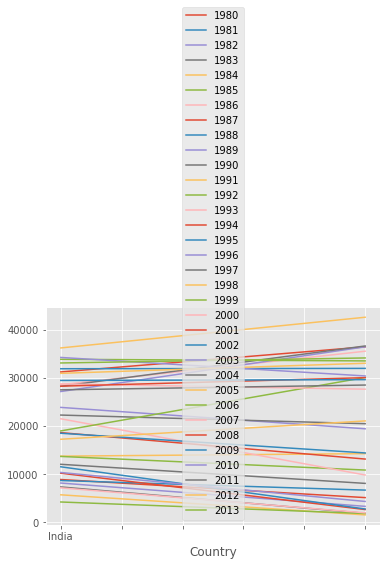

In [96]:
### plot the graph

df_CI.plot(kind='line')

In [97]:
# we should transpose the data to get the right look
df_CI = df_CI.transpose()
df_CI.head()

Country,India,China
1980,8880,5123
1981,8670,6682
1982,8147,3308
1983,7338,1863
1984,5704,1527


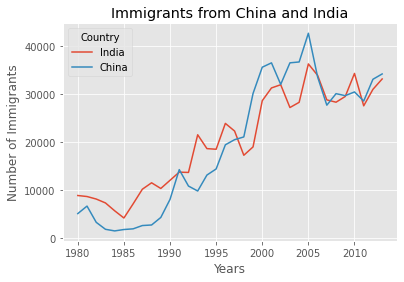

In [98]:
### plotting the graph right


df_CI.index = df_CI.index.map(int) # let's change the index values of df_CI to type integer for plotting
df_CI.plot(kind='line')



plt.title('Immigrants from China and India')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')



plt.show()


From the above plot, we can observe that the China and India have very similar immigration trends through the years. 

Line plot is a handy tool to display several dependent variables against one independent variable. However, **it is recommended that no more than 5-10 lines on a single graph;** any more than that and it becomes difficult to interpret.

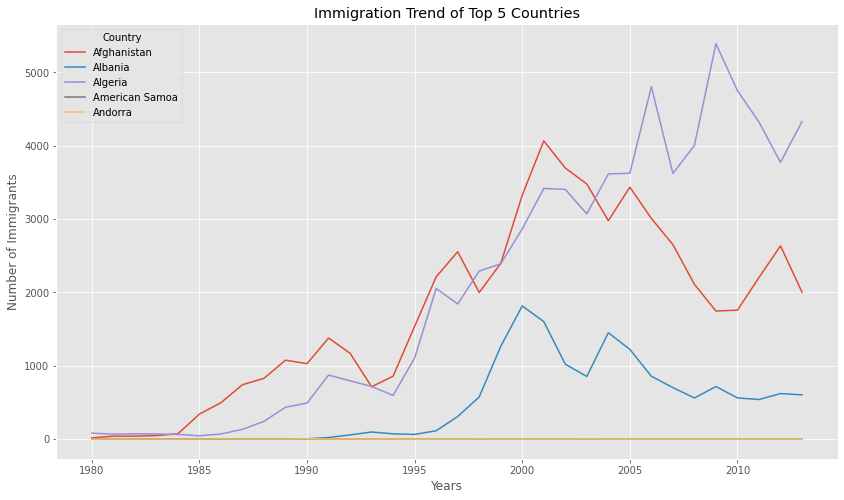

In [100]:
### Compare the trend of top 5 countries that contributed the most to immigration to Canada.

# get the top 5 entries
df_top5 = df_can.head(5)



# transpose the dataframe
df_top5 = df_top5[years].transpose() 



# print(df_top5)



# Step 2: Plot the dataframe. To make the plot more readeable, we will change the size using the `figsize` parameter.
df_top5.index = df_top5.index.map(int) # let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='line', figsize=(14, 8)) # pass a tuple (x, y) size



plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')



plt.show()

